# __LINEAR REGRESSION FROM SCRATCH__

### __Get data and plot__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=np.array([1,2,3,4,5,6,7,8,9,10])
Y=np.array([6.10,5.33,9.16,9.68,11.08,15.90,14.12,19.45,22,22.69])

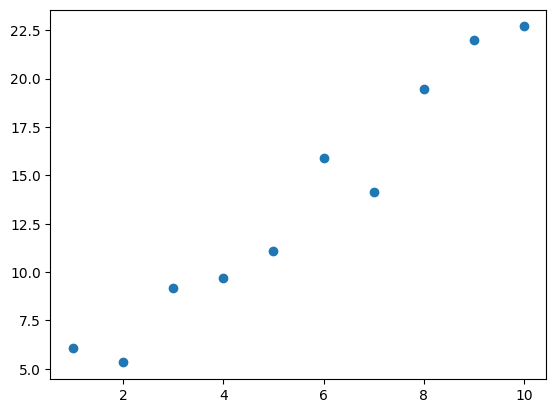

In [3]:
plt.scatter(X,Y)
plt.show()

### __Gradient descent from scratch__

__Define gradient__

In [4]:
# The parameters a and b are input as a 1D array of two elements called coefs
# coefs[0] is a and coefs[1] is b
def my_gradient (X,Y,coefs):
  # n is the number of training examples
  n = len(X)
  a, b = coefs[0], coefs[1]

  # Slope in the direction a
  da = -1/n * np.dot(X, Y - a * X - b)

  # Slope in the direction b
  db = -1/n * np.sum(Y-a*X-b)


  return np.array([da,db])

In [5]:
# coefs is (a,b)_old
def iter(coefs,grad,alpha):
  ab_new = coefs - alpha * grad
  return ab_new

__Define update__

__Main code__

In [10]:
# Learning rate
alpha = 0.001

# Maximum number of iterations (or "updates", or "epochs")
iter_max = 50_000

# Select an initial value for a and b
# We pick a = b = 0, but we we could pick any value, and even random values
a = 0
b = 0

coefs=np.array([a,b])
print("Initial =",coefs)

for i in range(iter_max):
  # Compute gradient
  grad = my_gradient(X,Y,coefs)

  # Compute an update
  coefs = iter(coefs,grad,alpha) # this means that: coefs = coefs - alpha * grad

  if (i%10000==0):
    print("Iteration =",i)

print ("Final coefficients = ", coefs)

Initial = [0 0]
Iteration = 0
Iteration = 10000
Iteration = 20000
Iteration = 30000
Iteration = 40000
Final coefficients =  [2.03388682 2.36461075]


In [34]:
print ("Final coefficients = ", coefs)

Final coefficients =  [2.03388682 2.36461075]


__Make predictions__

In [29]:
# Y_hat = aX+b
Yhat = coefs[0]*X + coefs[1]
net_error = 1/(2*len(X))*np.sum((Y-Yhat)**2)

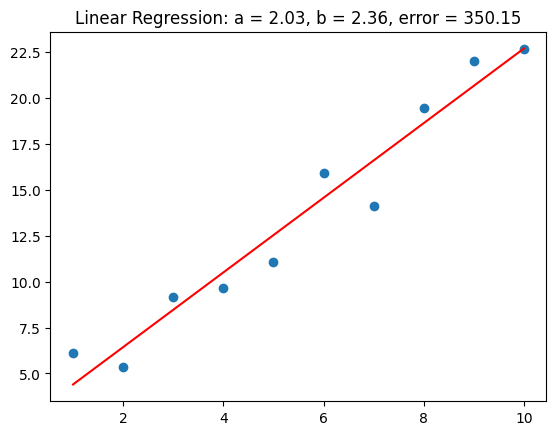

In [30]:
plt.scatter(X,Y)
plt.plot(X,Yhat,color='red')
plt.title(f"Linear Regression: a = {coefs[0]:.2f}, b = {coefs[1]:.2f}, error = {net_error:.2f}")
plt.show()

In [9]:
# error = 1/2n * sum (true_Yi - predicted_Yi)^2
print("Error = ",1/(2*len(X))*np.sum((Y-Yhat)**2))

Error =  0.8872799397290037


 __LINEAR REGRESSION: AUTOMATED USING SKLEARN__

In [32]:
from sklearn.linear_model import LinearRegression
X=np.array([1,2,3,4,5,6,7,8,9,10])[:,np.newaxis]
Y=np.array([6.10,5.33,9.16,9.68,11.08,15.90,14.12,19.45,22,22.69])

In [34]:
myreg = LinearRegression()
my_fit = myreg.fit(X,Y)

__Display coefficients__

In [35]:
print(my_fit.coef_)
print(my_fit.intercept_)

[2.03387879]
2.3646666666666647


__Make predictions__

In [28]:
Yhat = myreg.predict(X)
for i in range(len(X)):
  sample_error = 100 * (Y[i] - Yhat[i]) / Y[i]
  print(f"X: {X[i]}, Y: {Y[i]}, Yhat: {Yhat[i]}, error: {sample_error:.02f}%")
net_error = 1/(2*len(X))*np.sum((Y-Yhat)**2)
print(f"net_error: {net_error}")

X: [1], Y: 6.1, Yhat: 4.398545454545452, error: 27.89%
X: [2], Y: 5.33, Yhat: 6.432424242424241, error: -20.68%
X: [3], Y: 9.16, Yhat: 8.46630303030303, error: 7.57%
X: [4], Y: 9.68, Yhat: 10.500181818181817, error: -8.47%
X: [5], Y: 11.08, Yhat: 12.534060606060605, error: -13.12%
X: [6], Y: 15.9, Yhat: 14.567939393939394, error: 8.38%
X: [7], Y: 14.12, Yhat: 16.60181818181818, error: -17.58%
X: [8], Y: 19.45, Yhat: 18.63569696969697, error: 4.19%
X: [9], Y: 22.0, Yhat: 20.669575757575757, error: 6.05%
X: [10], Y: 22.69, Yhat: 22.703454545454544, error: -0.06%
net_error: 0.8872799393939396


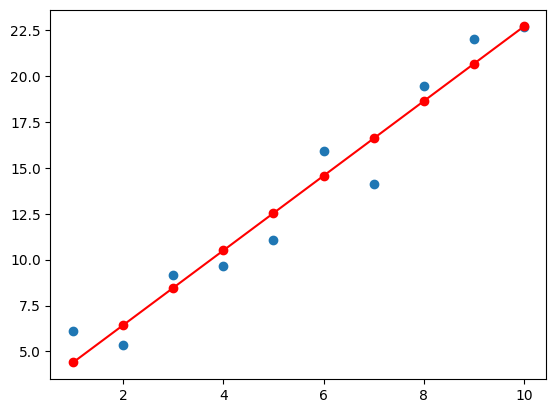

In [20]:
plt.scatter(X,Y)
plt.scatter(X,Yhat,color='red')
plt.plot(X,Yhat,color='red')
plt.show()

In [21]:
print("Error = ",1/(2*len(X))*np.sum((Y-Yhat)**2))

Error =  0.8872799393939396


__Ridge Regression__

ridge_reg.coef_: [2.03141646]. ridge_reg.intercept_: 2.378209443099271


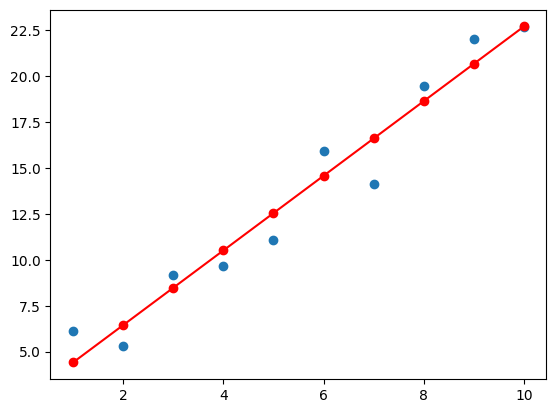

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X,Y)
print(f"ridge_reg.coef_: {ridge_reg.coef_}. ridge_reg.intercept_: {ridge_reg.intercept_}")
ridge_reg.predict(X)

# plot the ridge regression
plt.scatter(X,Y)
plt.scatter(X,ridge_reg.predict(X),color='red')
plt.plot(X,ridge_reg.predict(X),color='red')
plt.show()

__Lasso Regression__

lasso_reg.coef_: [2.02175758]. lasso_reg.intercept_: 2.431333333333331


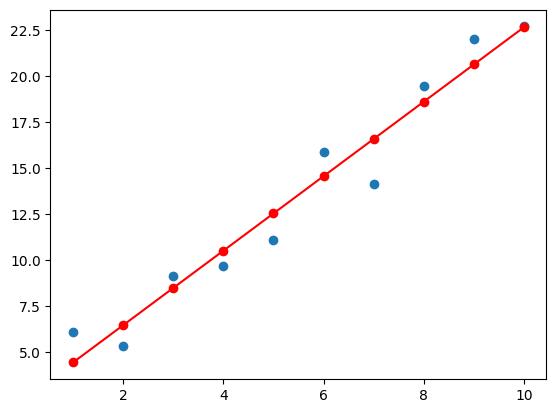

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,Y)
print(f"lasso_reg.coef_: {lasso_reg.coef_}. lasso_reg.intercept_: {lasso_reg.intercept_}")
lasso_reg.predict(X)

# plot the lasso regression
plt.scatter(X,Y)
plt.scatter(X,lasso_reg.predict(X),color='red')
plt.plot(X,lasso_reg.predict(X),color='red')
plt.show()


__ElasticNet Regression__

elastic_reg.coef_: [2.01560241]. elastic_reg.intercept_: 2.465186746987948


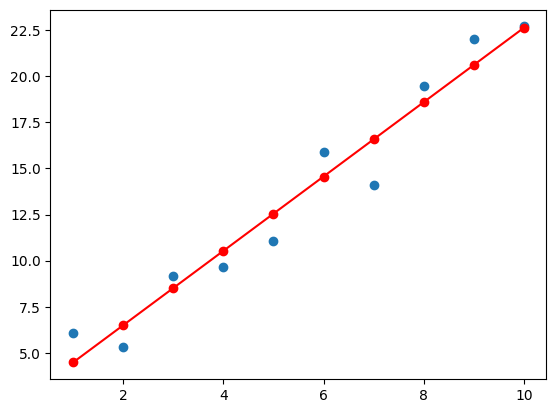

In [40]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X,Y)
print(f"elastic_reg.coef_: {elastic_reg.coef_}. elastic_reg.intercept_: {elastic_reg.intercept_}")
elastic_reg.predict(X)

# plot the elastic net regression
plt.scatter(X,Y)
plt.scatter(X,elastic_reg.predict(X),color='red')
plt.plot(X,elastic_reg.predict(X),color='red')
plt.show()
